# Predicting heart disease with machine learning 
## Introduction to Data Science Algorithms (Final Project)
## Joaquin Quintana

# Overview

Heart disease is the number one cause of death in the United States with the [CDC](https://www.cdc.gov/heartdisease/index.htm#:~:text=Heart%20disease%20is%20the%20leading,can%20lead%20to%20heart%20attack.) reporting 1 in 4 citizens perish from heart related morbidities. Sex, diet and preexisting conditions are all factors which can help physicians and patients learn from and prevent heart related disease. Early detection of heart related morbidities is key to preventive care and prolonged life. Today data collected at patient visits is used to create models to predict the chance of a patient having heart disease. Here I utilize one such dataset which is avilable on the [UCI Machine learning repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) site and [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877).

<center><img src="business-3362081_640.jpg" width="550" height="1000"/></center>

[Image Source](https://pixabay.com/photos/business-businessman-business-card-3362081/)

The Cleveland database is subset of the data set mentioned above and is formatted for machine learning with intent of predicting heart disease. The Cleveland subset contains 14 features that will be used to investigate regression models (start with logistic regression, muliclass logistic regression and then random forest) for predicting heart disease. This data is clean with the exception of a few differences found by kaggle user [Initpic](https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877).

Due to the slight difference I chose to work with both the UCI and Kaggle data to refernce and compare. Both dataset sources are imported and rows that contain NaNs in the UCI dataset are identified. The same rows which were identified UCI data were removed in the Kaggle data. After removing the rows of interest there are 297 rows of data to utilize. 



## The 14 attributes shown below are defined in the [UCI Data Set Description](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names) and briefly here:


* **age:**         age in years
* **sex:**         sex (1 = male; 0 = female)
* **cp:**          chest pain type
                   * Value 1: typical angina
                   * Value 2: atypical angina
                   * Value 3: non-anginal pain
                   * Value 4: asymptomatic            
* **trestbps:**    resting blood pressure (in mm Hg on admission to the hospital)

* **chol:**        serum cholestoral in mg/dl

* **fbs:**         (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

* **restecg:**     resting electrocardiographic results
                   * Value 0: normal
                   * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                   * Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
                    
* **thalach**     maximum heart rate achieved

* **exang**       exercise induced angina (1 = yes; 0 = no)

* **oldpeak**     ST depression induced by exercise relative to rest: ST depression refers to a              finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline

* **slope**       the slope of the peak exercise ST segment

* **ca**          number of major vessels (0-3) colored by flourosopy

* **thal**        3 = normal; 6 = fixed defect; 7 = reversable defect

* **target**      0 = disease free; 1 = may have disease

# Start Cleaning Process
## Import numpy, pandas and matplotlib for data cleaning and wrangling. 

In [106]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First I want to sort both the data sets by age and reset the indexes to get the DataFrames rows to match.

In [5]:
## Data on heart disease from Kaggle
df = pd.read_csv('heart.csv') #kaggle
df = df.sort_values('age') # sort by age 
df = df.reset_index(drop=True)
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
1,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
3,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
4,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
5,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
6,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
7,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
8,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
9,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header = None)# uci data 
df2.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df2 = df2.sort_values('age')
df2 = df2.reset_index(drop=True)
df2.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,1.0,0.0,3.0,0
1,34.0,1.0,1.0,118.0,182.0,0.0,2.0,174.0,0.0,0.0,1.0,0.0,3.0,0
2,34.0,0.0,2.0,118.0,210.0,0.0,0.0,192.0,0.0,0.7,1.0,0.0,3.0,0
3,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
4,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0,0
5,35.0,1.0,4.0,120.0,198.0,0.0,0.0,130.0,1.0,1.6,2.0,0.0,7.0,1
6,35.0,1.0,4.0,126.0,282.0,0.0,2.0,156.0,1.0,0.0,1.0,0.0,7.0,1
7,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
8,37.0,0.0,3.0,120.0,215.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
9,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Next, I will compare the two datasets and look for differences in type.

In [7]:
## Compare data types between Data frames
print('Downloaded from Kaggle \n')
print(df.info())

Downloaded from Kaggle 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [8]:
## Cont. compare data types between Data frames
print('Downloaded from UCI \n')
print(df2.info())

Downloaded from UCI 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


Comparing the two datasets we see there are differnces between the types. Here the UCI data was found to have two columns marked as object and these are the columns which contain NaNs denoted with a '?'. So we can search through these two columns for the rows indexes which have the NaNs. This is done below.

In [9]:
df2[df2.thal == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
106,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
119,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0


In [10]:
df2[df2.ca == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
9,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0
41,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
109,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
181,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0


Now that all the NaNs are loacted we see there are six rows which have erronous data which do not match the data on Kaggle. For example: after sorting the data by age and comparing columns containg objects we find a ? at row nine in the UCI data but in the same place we find a four in the data downloaded from Kaggle. Becuase there are only six instances where the data sets differ I will simply drop these rows from the data. 

In [11]:
#create index lists for the row which contain NaNs
ca_Nan_index= df2.index[df2.ca == '?'].tolist()
thal_Nan_index = df2.index[df2.thal == '?'].tolist()

#concatenate list
drop_Nan_index = thal_Nan_index + ca_Nan_index

print('List of indexs containg Nans',drop_Nan_index)

List of indexs containg Nans [106, 119, 9, 41, 109, 181]


Above I created a list of indexes for the rows we want to drop. The rows can be dropped from the Kaggle data by using df.drop. After dropping the rows of interest I display the first 10 rows in the DataFrame and you will see nine is one of the rows dropped and is no longer present. 

Now the datasets are more or less the same but the dataset from Kaggle has a target column which is binary. This column in the UCI data was scored as 0 (disease free) or, with the attempt to distinguish presence, with 1,2,3,4. This was converted to binary for scoring and can be interpreted as:
* 0 = disease free
* 1 = may have disease

In [12]:
df = df.drop(df.index[drop_Nan_index])
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
1,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
3,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
4,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
5,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
6,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
7,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
8,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
10,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### As shown previously and below the data is type int with the exception of old peak. Later on I use sklearn and this package wants the data type to be float so here I convert the columns to float as requested by an error I received.

In [13]:
#cast types as float for processing. Use a dictionary to do so. 
df = df.astype({"age":'float', "sex":'float',"cp":'float',"trestbps":'float',"thalach":'float', "chol":'float',"fbs":'float',"restecg":'float',
                "exang":'float',"oldpeak":'float',"slope":'float',"ca":'float',"thal":'float'})

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None


## Lets begin the exploration



First I would like to look at how many of the rows are marked as diseased or not. To do this we will look at the target column using a count plot, which simply counts the instances of 0 or 1 and returns it as a chart. I will import seaborn and statsmodel to make the following figures. 
<center><img src="pexels-photo-1274260.jpeg" width="200" height="100"/></center>

[Image Source](https://www.pexels.com/photo/silhouette-of-person-holding-glass-mason-jar-1274260/)

In [15]:
import seaborn as sns
import statsmodels.formula.api as smf

Number of people without disease:  137
Number of people with disease: 160 



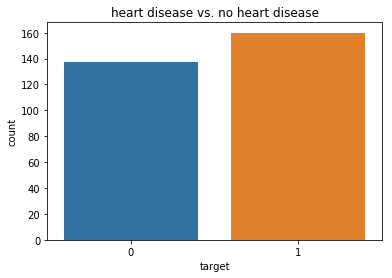

In [16]:
no_disease = sum(df.target == 0)
disease= sum(df.target == 1)
print('Number of people without disease: ',no_disease)
print('Number of people with disease:', disease,'\n')

#plot this info using seaborn plot
sns.countplot(df.target).set_title("heart disease vs. no heart disease");

Seaborns pairplot gives a nice overview and a way to look at all the data. This allows for a quick comparison across all groups and we can quickly see if correlations exist between factors or if the data is binary. Here the blue and orange show the target given the the factors. This is, do they have the diease or not. 

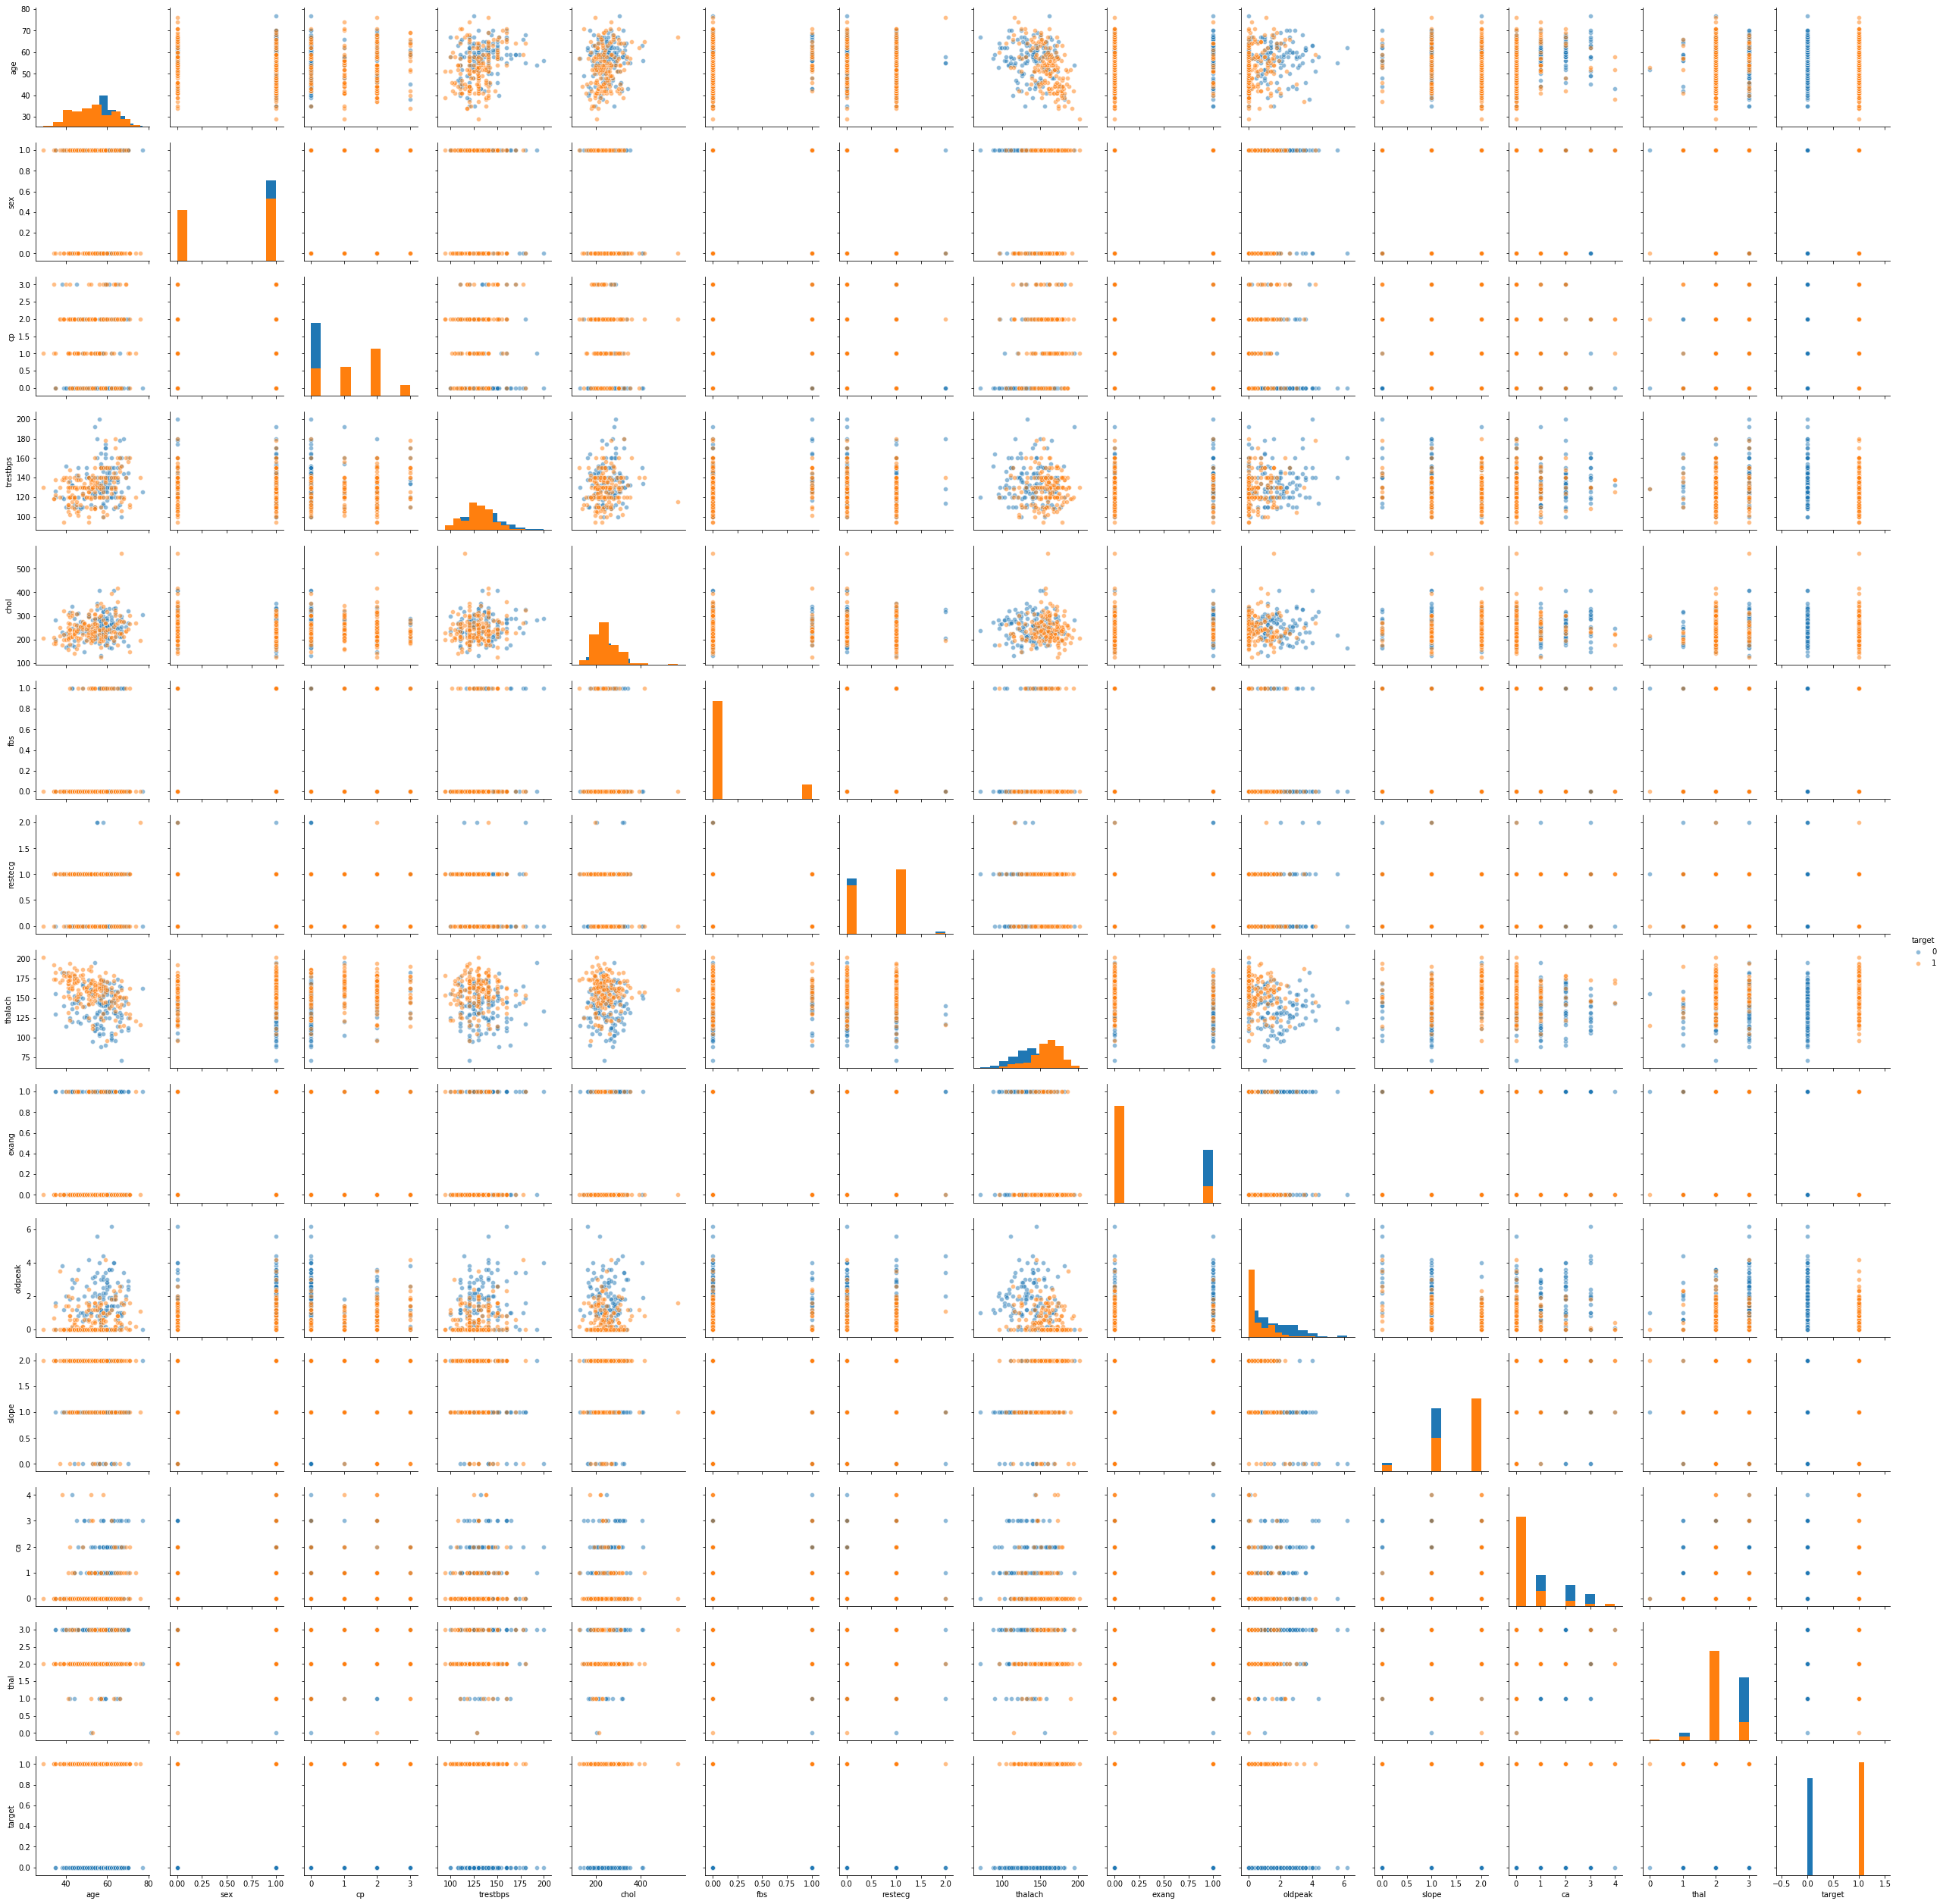

In [17]:
sns.pairplot(df, hue = 'target',diag_kind="hist",plot_kws={'alpha':0.5});

The correlation matrix is nice to find correlation coefficients between variables. It is a quick way to get an idea about a complex data set before moving on to more complex analysis. 

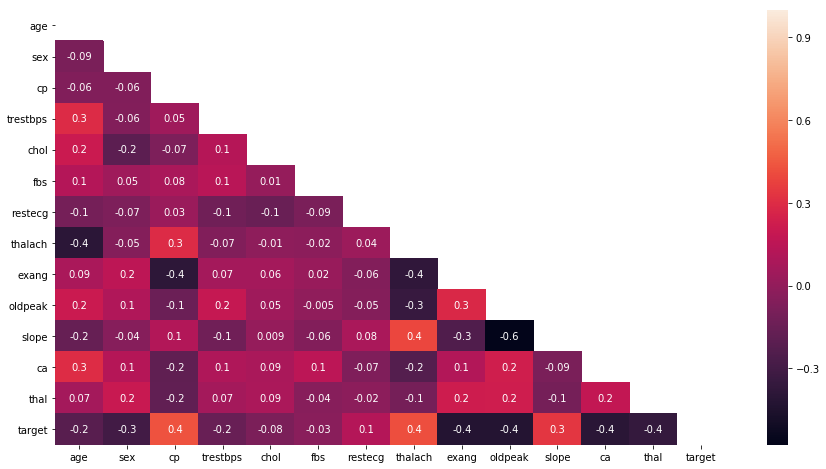

In [18]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
fig,ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),mask = mask,annot = True, fmt='.1g',ax=ax);

From the correlation matrix we can see there are intersting things happening with cp, thalach. So lets look at those closer before trying to train. 

First I will look at age vs thalach and fit a linear regression to this plot. I will use statsmodel to print the $R^2$ value for the regression line; a parameter used to demonstrate how well this data if fits the regressions model.  

In [19]:
#Begin regression model: calculate the regression model predicting the Density from the BMI
x = df.age
y = df.thalach
est = smf.ols('y ~ x', df).fit()

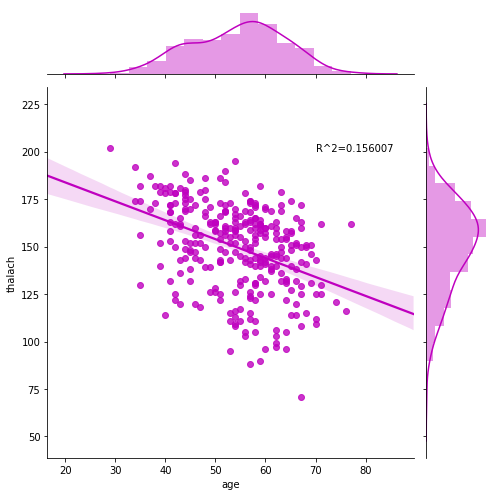

In [20]:
g = sns.jointplot(x="age", y="thalach", data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)
#plot r^2
plt.text(70,200, 'R^2=' + str(round(est.rsquared,6)));

Above we can see the linear regression is not great returning a  $R^2$ of 0.156. Lets look at the thalach data as the dependent closer by sepearting out the no disease group from the diease. Make age the indpendent. 

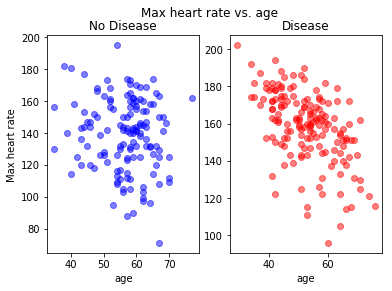

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2);
fig.suptitle('Max heart rate vs. age');
ax1.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="blue",alpha = 0.5);
ax2.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red",alpha = 0.5);

ax1.set_title('No Disease');
ax2.set_title('Disease');

ax1.set_xlabel('age');
ax2.set_xlabel('age');
ax1.set_ylabel('Max heart rate');

## Lets start with Logisitc Regression

From the above exploration it appears logistic regression would work to fit the factors to a model given the target is binary and we have several factors to work with. First I will work with one factor and then perform multiclass logistic regression. 

Logistic regression takes the approach of assuming that Y belongs to a particular category rather than modeling the response of Y [1]. We will see in this case it works well as out target can be used as the category which is diseased or non-diseased. 

Below I use seaborns plot to try and fit a logist regression model to thalach as a single factor. 

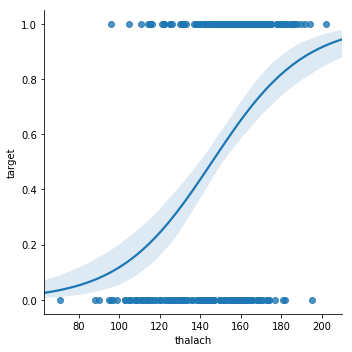

In [22]:
# Show the survival probability as a function of age and sex
g = sns.lmplot(x="thalach", y="target",data=df, logistic=True, truncate=False)

### Lets do this Logistic Regression ourselves with thalach as the single factor as was done using seaborn.

In [23]:
import sklearn.linear_model

I'll split the data manually here for the purpose of keeping this section constant. Later I will use a more robust method for spliting that data into test and train sets.  

In [24]:
X_train, X_test, y_train, y_test = df.thalach[0::2], df.thalach[1::2],df.target[0::2], df.target[1::2]
X_train, X_test = np.array(X_train).reshape(-1, 1), np.array(X_test).reshape(-1, 1)

print('xtest shape: ',X_test.shape,'ytrain shape: ',y_test.shape)
print('ytest shape: ',X_train.shape,'ytest shape: ',y_train.shape)

xtest shape:  (148, 1) ytrain shape:  (148,)
ytest shape:  (149, 1) ytest shape:  (149,)


In [25]:
#define function for one factor using sklearns 
def logistic(model, x):
    z = np.exp(model.intercept_ + model.coef_ * x)
    return  z / (1 + z)

The above function is an equation for logistic function, which will be used below. The values of the function range from 0 to 1. Therefore the logistic function for one factor is: $$Logistic Regression = \frac{e^x}{1+e^x}$$ 

Here x is $$ x = {\beta_0 + \beta_1 * X}$$ 

This is, 

$$ p(X) = \frac{e^{\beta_0 + \beta_1 * X}}{1+e^{\beta_0 + \beta_1 * X}}$$ 

And $\beta_0$ and $\beta_1$ are the intercept and logistic coefficient, respectively.

Train model using sklearn and thalach as the single factor. 

In [26]:
lr = sklearn.linear_model.LogisticRegressionCV()#use logistic with  cross-validation generator
default_mod = lr.fit(X_train,y_train)#fit the data and provide the target

Print out the intercept (b0) and logistic coeffient (b1) predicted by sklearn.

In [27]:
print('Intercept (b0) is', default_mod.intercept_,'\n')
print('Logistic coefficient (b1) is', default_mod.coef_)

Intercept (b0) is [-6.72005755] 

Logistic coefficient (b1) is [[0.04545803]]


#### Now use sklearn to return the calibrated probailites of the model. 

In [28]:
yhat = default_mod.predict(X_train)
yhat_p = default_mod.predict_proba(X_train)

print('For a thalach reading of',' '.join (map(str, X_train[0])), 'we get a probability',
      
' '.join (map(str,logistic(default_mod, X_train[0]))), 'yhat is', yhat[0])

For a thalach reading of 202.0 we get a probability [0.92146812] yhat is 1


The yhat prediction of 1 implies the model predicts the person will have heart disease given a thalach reading of 202.
For this model things are classified into true and false by a threshold. Typically the threshold is 0.5 and values greater than 0.5 are classified as true and values less than 0.5 as false. The threshold can be adjusted depending on the users needs and domain knowledge. 

Now that the model is made, we can plot the predicted values (y_hat) aginst the factor (thalach readings) and see how things were predicted. Logistic regeression has a sigmodial curve as can be seen below. The horizontal blue line marks the threshold and is the dividing line for whether someone is classified as having heart disease (probabilities > 0.5) or not (probabilities below < 0.5). The green dots are the target values showing if someone has the disease or not. The read dots are created using the logistic function (defined above), the intercept and logistic coefficent determined earlier. The blue dots are the results  from sklearn prediction.

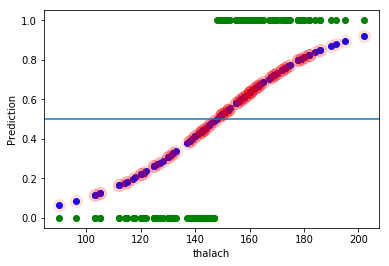

In [29]:
plt.plot(X_train,yhat,'go');
plt.plot(X_train,yhat_p[:,1],'bo');
plt.plot(X_train, logistic(default_mod, X_train), 'ro', alpha = 0.1,markersize = 12)
plt.axhline(0.5);
plt.xlabel('thalach')
plt.ylabel('Prediction');

In [30]:
#predict how well model fits the known data.
y_pred = default_mod.predict(X_test)


print('Training Score: ',round(default_mod.score(X_train, y_train),3))
print('Testing Score: ',round(default_mod.score(X_test, y_test),3),'\n')

print('Using Thalach as the only factor for the prediction model we get a testing score of: ',round(default_mod.score(X_test, y_test),3),
     'and a training score: ',round(default_mod.score(X_train, y_train),3))


Training Score:  0.745
Testing Score:  0.676 

Using Thalach as the only factor for the prediction model we get a testing score of:  0.676 and a training score:  0.745


In [31]:
from sklearn.metrics import confusion_matrix, classification_report

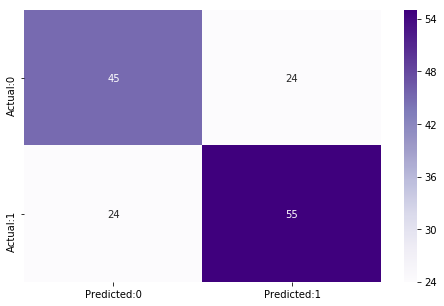

Classification Report: =
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        69
           1       0.70      0.70      0.70        79

    accuracy                           0.68       148
   macro avg       0.67      0.67      0.67       148
weighted avg       0.68      0.68      0.68       148



In [32]:
# Confusion matrix 
y_pred = default_mod.predict(X_test)

  
cm = confusion_matrix(y_test, y_pred)
conf_matrix_lg_single = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix_lg_single, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

default_mod_cr = classification_report(y_test, y_pred)
print('Classification Report: =')
print (default_mod_cr)

## Interpreting Confusion Matrix

* **True Negative:** number of non-diseased candidates determined by the classifier to be non-diseased

* **True Positive:** number of diseased candidates determined by the classifier to be diseased

* **False Positive:** number of non-diseased candidates determined by the classifier to be diseased

* **False Negative:** number of diseased candidates determined by the classifier to be non-diseased

In [33]:
print('This is, of the', cm[0,0], 'non-diseased candidates only', cm[0,1], 'were misclassified as having the disease and of the candidates', cm[1,1], 'who had the disease, only', cm[1,0],'were misclassified as not having the disease.\n')

This is, of the 45 non-diseased candidates only 24 were misclassified as having the disease and of the candidates 55 who had the disease, only 24 were misclassified as not having the disease.



**Results for single factor logisitic regression:** Using only Thalach in the model we end up with a socre of ~ 0.676, which is not great. Ususally a model is considered useful if it is scoring above .80

Lets see if we can get this up by using the other factors using this type of model, but first we need to talk about multicollinearity.

#### Multicollinearity problem

I know that medical data tends to have a lot of correlations (even if they are not truly correlated) and often presents a Multicollinearity problem. Here I will show the the variance inflation factor read more at [VIF Wikipedia](https://en.wikipedia.org/wiki/Variance_inflation_factor#:~:text=In%20statistics%2C%20the%20variance%20inflation,ordinary%20least%20squares%20regression%20analysis.) for the factors in the UCI dataset. What we will see is that all of the factors show moderate to high collinearity and therefore I have a [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity#:~:text=In%20statistics%2C%20multicollinearity%20(also%20collinearity,a%20substantial%20degree%20of%20accuracy.)) problem. Here I will compute the variance inflation factor using [statsmodel](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html). The variance inflation factor in the statsmodel documentaiton states factors are highly collinear if the value is larger than 5. There are further details on Wikipedia and other sites which set moderate from high but in gernal the closer to on the less colinear. 

In [62]:
#Using statsmodel to determine the variance inflation factor. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
#create new df for VIF comp
VIF_df = pd.DataFrame()
VIF_df['factors'] = df.columns
#compute the VIF 
VIF_df['VarianceInfluenceFactor'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

In [64]:
VIF_df.sort_values(by = 'VarianceInfluenceFactor', ascending = False)

,factors,VarianceInfluenceFactor
3,trestbps,59.526463
7,thalach,47.431696
0,age,40.306849
4,chol,26.240752
12,thal,17.976652
10,slope,10.142246
13,target,4.361960
1,sex,3.676949
9,oldpeak,3.118713
2,cp,2.581459


In [65]:
#Get VIF values greater than 5. Call these highly colinear
VIF_df_highly_colinear = VIF_df[VIF_df.VarianceInfluenceFactor > 5]
VIF_df_highly_colinear

,factors,VarianceInfluenceFactor
0,age,40.306849
3,trestbps,59.526463
4,chol,26.240752
7,thalach,47.431696
10,slope,10.142246
12,thal,17.976652


In [66]:
#Get VIF values greater than 1 and less than or equal to 5. Call the moderatly colinear
VIF_df_moderatly_colinear = VIF_df[(VIF_df.VarianceInfluenceFactor >= 1) & (VIF_df.VarianceInfluenceFactor <= 5)]
VIF_df_moderatly_colinear

,factors,VarianceInfluenceFactor
1,sex,3.676949
2,cp,2.581459
5,fbs,1.253680
6,restecg,2.044099
8,exang,2.065340
9,oldpeak,3.118713
11,ca,2.011632
13,target,4.361960


One way to fix the multicollinearity problem is to preprocess the data, which will be discussed next. 

# Preprocessing data

Preprocessing can be done using sklearns [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and [transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform) which scale the data to unit variance and then transform the data. This is, each factor is taken independently, scaled and transformed to a normal distribution with mean = 0 and standard deviation = 1. The scaleing keeps the overall trends for each factor and will not change the results. 

The reason we perform this preprcoessing is to ensure all the values are within a scale that can be used to make comparisons between factors which may have wildly differing units or scales which would be erronous to compare. For example, it makes no sense to compare cholestrol values showing serum cholestoral in mg/dl with voltage readings taken for electrocardiograms. This will also fix the multicollinearity problem which I will show below. 

**As a note this is the way [Sklearn's documentaion](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) descibes preprocessing:** the common utility functions and transformer classes are used to change raw feature vectors into a representation that are more suitable for the downstream estimators. In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate.

Lets look at all the raw data as boxplots before preprocessing. 


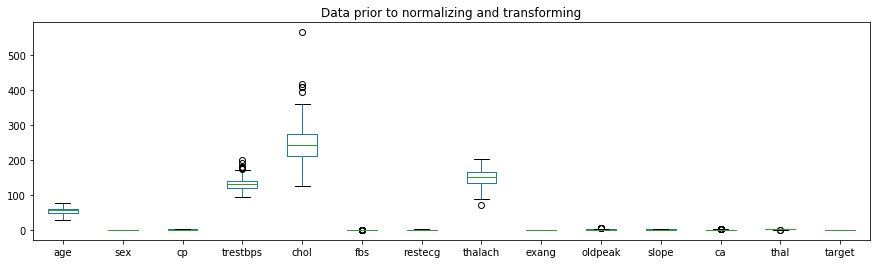

In [67]:
#plt.rcParams['axes.facecolor'] = 'white'
df.plot.box(figsize=(15,4));
plt.title('Data prior to normalizing and transforming');

Now preprocess the data. 

In [68]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import accuracy_score

First, for preprocessing I use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn to randomly split the data into two sets. Set one contains 30% of the data (used for testing) and set two holds the other 70%  of the data (used for training). This is performed so we can use one set for training and the other set to test with, which ensures we are not performing both analysis on the same fraction of data. 

Next, we will need to specify which factors we want to use in the models moving forward and these are assigned to X. The target or ground truth values are set to y and is binary. Sklearn likes this data to be in a specific shape and assumes the data is normalized for each factor to make comparison between groups relevant. 

In [69]:
X = np.asarray(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']])
y = np.asarray(df['target'])
  
# Use Train and Test plit to split the data into two sets.
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (207, 13) (207,)
Test set: (90, 13) (90,)


In [70]:
#preprocess the train and test set. 
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now show the preprocessed training data we will use moving forward. 

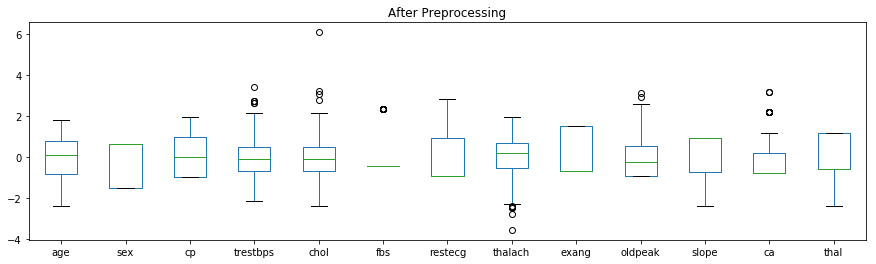

In [71]:
labels = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

dfp = pd.DataFrame(X_train,columns = labels)
dfp.plot.box(figsize=(15,4));
plt.title('After Preprocessing');

Now let's look at the variance inflation factor (VIF) to see if we still have multicollinearity, which should be fixed and the VIF for each factor should be closer to one indicating low multicollinearity in the data. 

In [72]:
#create new df for VIF comp
VIF_df = pd.DataFrame()
VIF_df['factors'] = dfp.columns
#compute the VIF 
VIF_df['VarianceInfluenceFactor'] = [variance_inflation_factor(dfp.values,i) for i in range(len(dfp.columns))]
VIF_df.sort_values(by = 'VarianceInfluenceFactor', ascending = False)

,factors,VarianceInfluenceFactor
9,oldpeak,1.802628
10,slope,1.791076
7,thalach,1.596450
0,age,1.540010
8,exang,1.403572
2,cp,1.344395
1,sex,1.271417
3,trestbps,1.247317
4,chol,1.215057
11,ca,1.191353


## Muliticlass Logistic Regression 

Here all the factors are used to train the model and I'll use sklearn to do this. By default all classifiers in scikit-learn do [multiclass classification](https://scikit-learn.org/stable/modules/multiclass.html) out-of-the-box. 

**Note:** I experimented with mlxtend forward feature selection and sklearns feature_selection models and found that there was little to no improvement when using subsets of the attributes on this data set. The computation time, I found, was not worth keeping the feature selection wrappers and I decided to not use them here. This was a surprise as I recently completed a data mining project looking at twitter bot using Random Forest Classification and the feature selection there was prudent to getting accurate results. 

Below, we can call LogisticRegression which is a linear model from sklearn that we will use to fit the model. 

In [73]:
logreg = sklearn.linear_model.LogisticRegression(C=1e20)

#fit the model 
X = logreg.fit(X_train, y_train)

#predict how well model fits the known data.
y_pred = logreg.predict(X_test)

print('Training Score: ',round(logreg.score(X_train, y_train),3))
print('Testing Score: ',round(logreg.score(X_test, y_test),3),'\n')
print('Above we see the score is better using all 13 factors coming back at', round(logreg.score(X_test, y_test),3),'\n')

Training Score:  0.855
Testing Score:  0.822 

Above we see the score is better using all 13 factors coming back at 0.822 



Let's look at the confusion matrix to get more details on how well this model does. 
Using [sklearn confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), which can be interpreted as (from sklearn documentation): In binary classification, the count of **true negatives:** $C(0,0)$, **false negatives:** is $C(0,1)$, **true positives:** is $C(1,0)$ and **false positives:** is $C(1,1)$. Often times people are simply looking at the dignoal with hopes the the majority of the data is falling along the diagnoal which is **true negatives:** $C(0,0)$ and  **true positives:** is $C(1,0)$.

Below the confusion matrix is the classification report which shows precision, recall, F1-score and the accuracy score. 

The *precision* and *recall* can be combined into something called the $F_1$ score. This is,

$$F_1 = \frac{2}{1/\textrm{recall} + 1/\textrm{precision}}$$ 

This takes on value '1' for best and '0' for worst precision & recall -- i.e. it's a single "higher is better" metric to avoid making two comparisons.

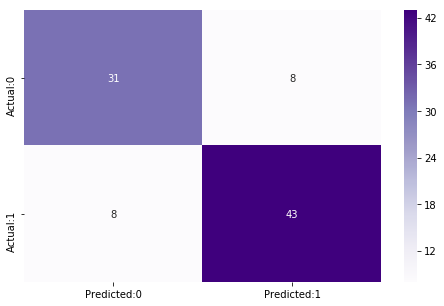

Classification Report: =
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        39
           1       0.84      0.84      0.84        51

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



In [74]:
# Confusion matrix 
cm = confusion_matrix(y_test, y_pred)
conf_matrix_lg = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
#use seaborn to make the confusion matrix have heatmap coloring
sns.heatmap(conf_matrix_lg, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

conf_matrix_lg_cr = classification_report(y_test, y_pred)
print('Classification Report: =')
print(conf_matrix_lg_cr)

Lets walk through how to compute the accuracy, recall and precision ourselves given the confusion matrix.




In [75]:
#compute model accuracy given confusion matrix
accuracy  = (cm[0,0] + cm[1,1])/ np.sum(cm)

#compute model precision given confusion matrix
precision_0 = round(cm[0,0]/np.sum(cm[:,0]),2)
precision_1 = round(cm[1,1]/np.sum(cm[:,1]),2)

#compute model recall given confusion matrix
recall_0 = round(cm[0,0]/np.sum(cm[0,:]),2)
recall_1 = round(cm[1,1]/np.sum(cm[1,:]),2)

#compute model f1-score given confusion matrix
f1_score_0 = round(2/((1/precision_0)+(1/recall_0)),3)
f1_score_1 = round(2/((1/precision_1)+(1/recall_1)),3)

#organize and report results
results = pd.DataFrame([[precision_0,precision_1],[recall_0,recall_1],[f1_score_0,f1_score_1]]).T
results.columns = ['precision','recall','f1-score']
print('Basic classification report: \n')
print('Model accuracy',accuracy,'\n')
results

Basic classification report: 

Model accuracy 0.8222222222222222 



,precision,recall,f1-score
0,0.79,0.79,0.79
1,0.84,0.84,0.84


## Now I will use another model known as Linear Discriminant Analysis 

Linear Discriminant Analysis (LDA) is another common linear model used for mulitclass data and usually provides similar results to logistic regression. However each has it place and ideal situation for when one would implement them. LDA and logistic regression both use linear decision bondaries, but the they differ in how parameters are estimated for the model or the fitting method used. Logistic regression uses the maximum likelihood and LDA uses the estimated mean and variance from a normal distribution and assumes a common covariance matrix per class.
Following from how the models are fit we can assume that when the data is not a Guassian distribution with common covariance matrix logisitc regression would out perform LDA and if this assumption is true then we would expect logistic regression to outperform LDA [1].


In [92]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [77]:
# your code here
ld = LinearDiscriminantAnalysis()
ld_model = ld.fit(X_train,y_train)

In [78]:
#predict how well model fits the known data.
y_pred = ld.predict(X_test)

conf_matrix_LDA = confusion_matrix(y_test, y_pred)
print('LDA Confusion Matrix:\n', conf_matrix_LDA,'\n')

conf_matrix_LDA_cr = classification_report(y_test, y_pred)
print(conf_matrix_LDA_cr)

# your code here
print('Training Score: ',round(ld.score(X_train, y_train),3))
print('Testing Score: ',round(ld.score(X_test, y_test),3))

LDA Confusion Matrix:
 [[31  8]
 [ 7 44]] 

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        39
           1       0.85      0.86      0.85        51

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90

Training Score:  0.86
Testing Score:  0.833


### Finally I'll use K-nearest Neighbors Classifer. 

K-nearest Neighbors (knn) uses distance measurements to determine the class which an observation is assigned to. The number of neighbors to condsider can be set prior to training and this is typipically determined experimentally. Overall, the algorithm assumes that things which are similiar in nature will be nearer to one another and can be grouped together to differnatiate other obervations from each other. 

Knn is non-parametric and makes no assumptions about the decision boundaries so it is a bit more flexible than parametric models. Therefore, if the data is highly non-linear we can assume that knn will out perform logistic regression and LDA as both are parametric models and make assumptions about the boundary shapes [1].

In [93]:
# Experimentally determine which k give the highest accuracy using recall and use this for model
recalls = []
ks = list(range(1,30))
for k in ks:
    neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors= k)
    neigh.fit(X_train, y_train)
    knn_hat = neigh.predict(X_test)
    knn_cm = sklearn.metrics.confusion_matrix(y_test, knn_hat)
    recalls.append( sklearn.metrics.recall_score(y_test, knn_hat, average='micro') )
kdat =pd.DataFrame(recalls, ks)

Smallest k with highest score, 7 and score for k    0.866667
Name: 7, dtype: float64


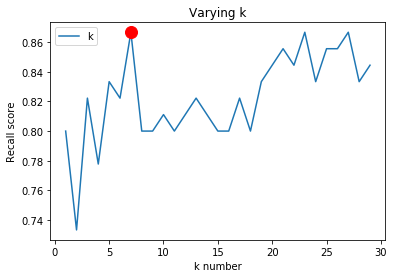

In [94]:
kdat.columns = ['k']
k = kdat['k'].idxmax()
print('Smallest k with highest score,', k,'and score for', kdat.loc[k])

#plot the k we found using recall on plot. 
kdat.plot();
plt.plot(k,kdat.loc[k].ravel(),'ro',markersize = 12)
plt.title('Varying k');
plt.xlabel('k number');
plt.ylabel('Recall score');

In [95]:
neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [96]:
knn_hat = neigh.predict(X_test)

In [97]:
# your code here
knn_cm = sklearn.metrics.confusion_matrix(y_test, knn_hat)
print('KNN(', k,') confusion matrix is = \n', '\n',knn_cm,'\n')
print('Success = ', knn_cm[1,1] / (knn_cm[1,0] + knn_cm[1,1]),'\n')
knn_cr = sklearn.metrics.classification_report(y_test, knn_hat)
print(knn_cr)

KNN( 7 ) confusion matrix is = 
 
 [[32  7]
 [ 5 46]] 

Success =  0.9019607843137255 

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.87      0.90      0.88        51

    accuracy                           0.87        90
   macro avg       0.87      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



# Next I will us a RandomForestClassifier

The Random Forest Classifier is an ensemble method which creates multiple models for testing. Briefly, this algorithm constructs a multitude of decision trees from subsets of the attributes and data which is then used for training. A majority vote is created on which tree works best and is reported. It works well with data that may show extreme variability and is known to not overfit the data [2]. Below is an example of a simplified version of this classification model and to do this I will use a [sklearns RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 


[Image source](https://community.tibco.com/wiki/random-forest-template-tibco-spotfire)

<center><img src="SimpleRFclassifier.png" width="400" height="200"/></center>

[Image Source](https://www.pexels.com/photo/silhouette-of-person-holding-glass-mason-jar-1274260/)

In [84]:
from sklearn.ensemble import RandomForestClassifier

We can set a few of the hyperparameters going into this type of model. Here I allow n_estimators = 1,000 which is the number of trees to consider in the forest. Random_state = 10, which controls the bootstrapping (which is used here as by defalut bootstrap=True) of the samples used when building trees and the features to consider when looking for the best split at each node (also provides back the same result each time if a value is specified; important for reproducability otherwise each time it will return a differnent result). Max_depth contols the depth of the trees which can be made. It is pretty straight forward and works ok as is. 

In [107]:
rf= RandomForestClassifier(n_estimators = 1000, random_state=10,max_depth=7, n_jobs=-1) #n_estimator = DT
%time rf.fit(X_train,y_train) # learning

CPU times: user 1.76 s, sys: 323 ms, total: 2.08 s
Wall time: 1.92 s


RandomForestClassifier(max_depth=7, n_estimators=1000, n_jobs=-1,
                       random_state=10)

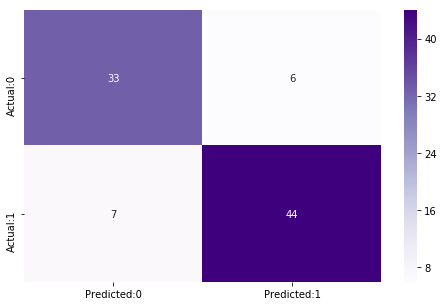

Classification Report: =
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.88      0.86      0.87        51

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90

Random Forest Test Score:  0.8555555555555555
Random Forest Train Score:  0.9951690821256038


In [91]:
#predict how well model fits the known data.
y_pred = rf.predict(X_test)

# Confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report
  
cm = confusion_matrix(y_test, y_pred)
conf_matrix_rf = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix_rf, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

cr_rf= classification_report(y_test, y_pred)
print('Classification Report: =')
print(cr_rf)

print("Random Forest Test Score: ",rf.score(X_test,y_test))
print("Random Forest Train Score: ",rf.score(X_train,y_train))

Here I pull out the features the model considers most relevant. 

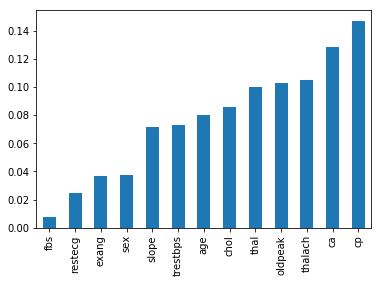

In [87]:
importances = rf.feature_importances_
importances = pd.DataFrame(importances,['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
importances=importances.rename(columns={0: "Features_Importance"})
importances  = importances.Features_Importance.sort_values()
importances.plot.bar();

Summarize results by showing confusion matricies as subplots and place the classification reports for each model below.

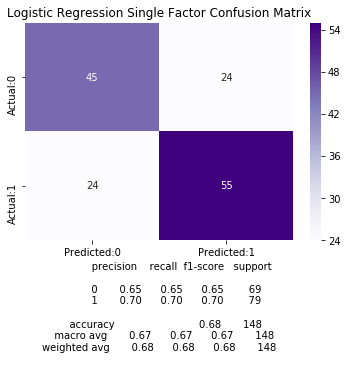

In [88]:
plt.title("Logistic Regression Single Factor Confusion Matrix");
sns.heatmap(conf_matrix_lg_single, annot = True, fmt = 'd', cmap = "Purples");
plt.xlabel(default_mod_cr);

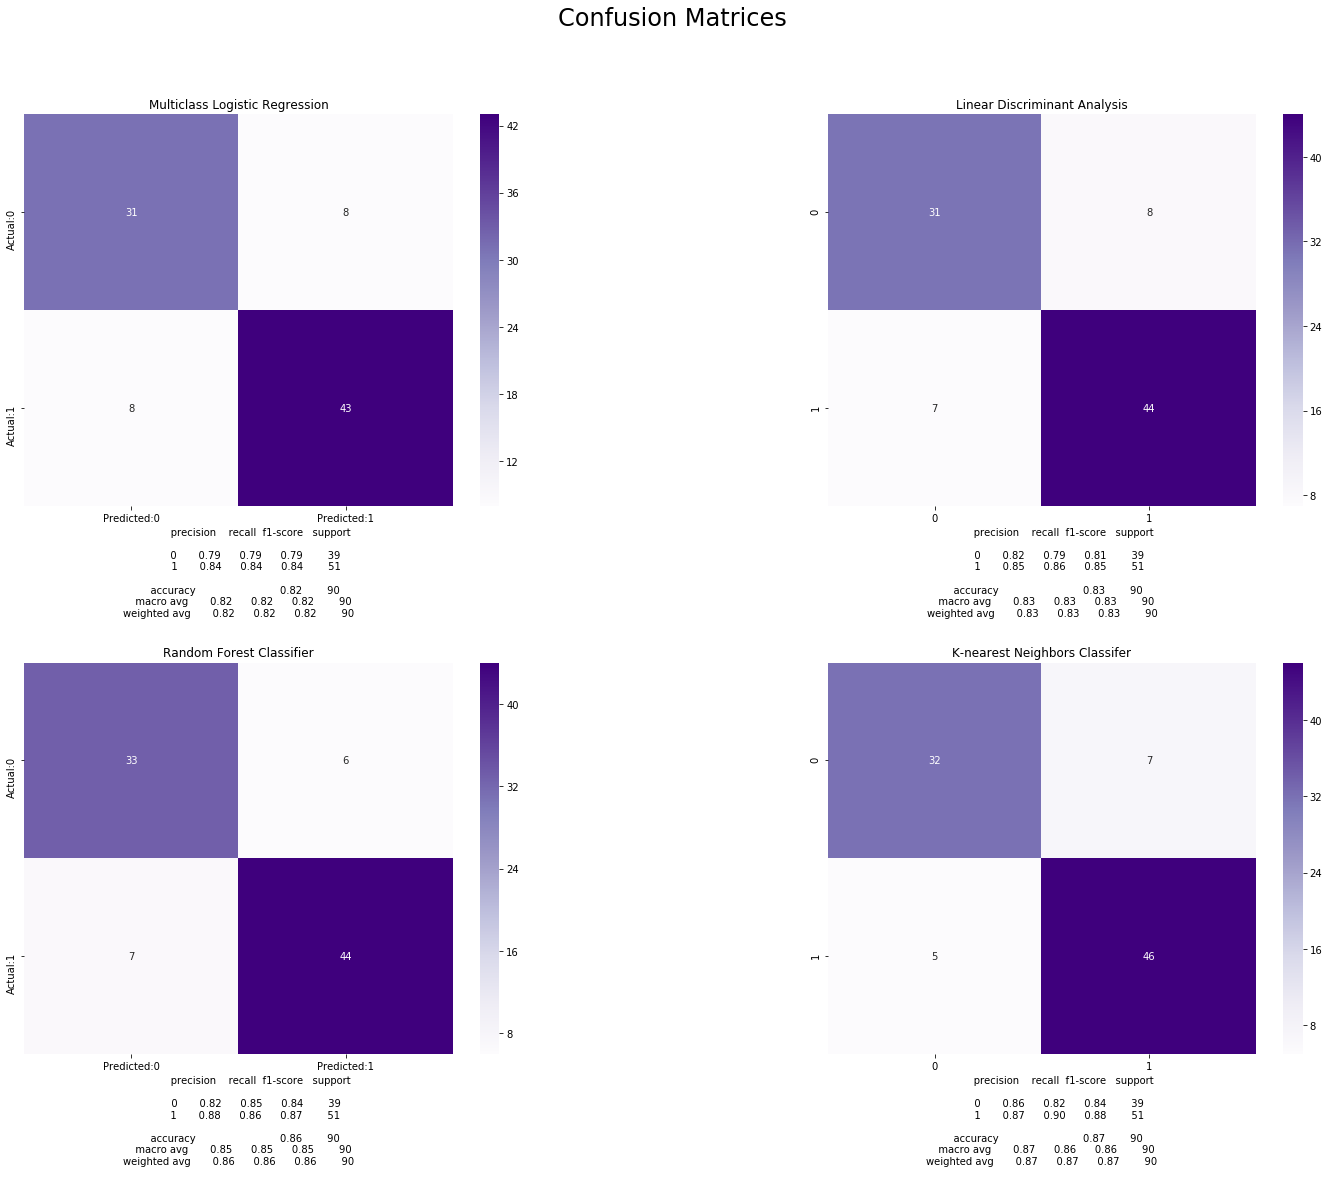

In [89]:
plt.figure(figsize=(24,15));
plt.suptitle("Confusion Matrices",fontsize=24);
plt.subplots_adjust(wspace = 0.5, hspace= 0.4,bottom=0.01)

plt.subplot(2,2,1);
plt.title("Multiclass Logistic Regression");
sns.heatmap(conf_matrix_lg, annot = True, fmt = 'd', cmap = "Purples");
plt.xlabel(conf_matrix_lg_cr);

plt.subplot(2,2,2);
plt.title("Linear Discriminant Analysis");
sns.heatmap(conf_matrix_LDA, annot = True, fmt = 'd', cmap = "Purples");
plt.xlabel(conf_matrix_LDA_cr);

plt.subplot(2,2,3);
plt.title("Random Forest Classifier");
sns.heatmap(conf_matrix_rf, annot = True, fmt = 'd', cmap = "Purples");
plt.xlabel(cr_rf);

plt.subplot(2,2,4);
plt.title("K-nearest Neighbors Classifer");
sns.heatmap(knn_cm, annot = True, fmt = 'd', cmap = "Purples");
plt.xlabel(knn_cr);

# Results

# Refernces



1. Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani. 2021. An introduction to statistical learning: with applications in R, Boston: Springer. 

2. Jiawei Han, Micheline Kamber, and Jian Pei. 2012. Data mining: concepts and techniques, Amsterdam: Elsevier. 

3. Anon. 2020. Detecting Multicollinearity with VIF - Python. (August 2020). Retrieved May 3, 2021 from https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/ 

